# Marketing Analytics Jumpstart Quick Installation


<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/marketing-analytics-jumpstart/blob/main/notebooks/quick_installation.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fmarketing-analytics-jumpstart%2Fmain%2Fnotebooks%2quick_installation.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/marketing-analytics-jumpstart/blob/main/notebooks/quick_installation.ipynb">
      <img width="32px" src="https://upload.wikimedia.org/wikipedia/commons/9/91/Octicons-mark-github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/marketing-analytics-jumpstart/main/notebooks/quick_installation.ipynb">
      <img src="https://www.gstatic.com/images/branding/gcpiconscolors/vertexai/v1/32px.svg" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
</table>

Follow this Colab notebook to quick install the Marketing Analytics Jumpstart solution on a Google Cloud Project.

> **Note:** You need access to the Google Analytics 4 Property, Google Ads Account and a Google Cloud project in which you will deploy Marketing Analytics Jumpstart, with the following permissions:
>> * Google Analytics Property Editor or Owner
>>
>> * Google Ads Reader
>>
>> * Project Owner for a Google Cloud Project
>>
>> * GitHub or GitLab account priviledges for repo creation and access token. [Details](https://cloud.google.com/dataform/docs/connect-repository)



Total Installation time is around **35-40 minutes**.

### 1. Authenticate to Google Cloud Platform

Click the ( ▶ ) button to authenticate you to the Google Cloud Project.

***Time: 30 seconds.***

In [ ]:
# @title
from google.colab import auth
auth.authenticate_user()

print('Authenticated')

Authenticated


### 2. Installation Configurations

Fill-out the form, and Click the ( ▶ ) button.

***Time: 10 minutes.***

In [ ]:
# @markdown ---
# @markdown # Google Cloud Platform
# @markdown Copy the `Project ID` from the "Project Info" card in the console [Dashboard](https://console.cloud.google.com/home/dashboard).
GOOGLE_CLOUD_PROJECT_ID = "your-project-id" #@param {type:"string"}
GOOGLE_CLOUD_QUOTA_PROJECT = GOOGLE_CLOUD_PROJECT_ID
PROJECT_ID = GOOGLE_CLOUD_PROJECT_ID
MAJ_DEFAULT_PROJECT_ID = GOOGLE_CLOUD_PROJECT_ID
# @markdown ---
# @markdown # Google Analytics 4
# @markdown For a quick installation, copy the Google Analytics 4 property ID and stream ID. You will find it in your Google Analytics 4 console, under Admin settings.
GA4_PROPERTY_ID = "1234567890" #@param {type:"string"}
MAJ_GA4_PROPERTY_ID = GA4_PROPERTY_ID
GA4_STREAM_ID = "1234567890" #@param {type:"string"}
MAJ_GA4_STREAM_ID = GA4_STREAM_ID
# @markdown The website your Google Analytics 4 events are coming from.
WEBSITE_URL = "https://shop.googlemerchandisestore.com" #@param {type:"string", placeholder:"Full web URL"}
MAJ_WEBSITE_URL = WEBSITE_URL
# @markdown ---
# @markdown # Google Ads
# @markdown For a quick installation, copy the Google Ads Customer ID. You will find it in your Google Ads console. It must be in the following format: `"CUSTOMERID"` (without dashes).
GOOGLE_ADS_CUSTOMER_ID= "1234567890" #@param {type:"string", placeholder:"GAds Account Number (e.g. 4717384083)"}
MAJ_ADS_EXPORT_TABLE_SUFFIX = "_"+GOOGLE_ADS_CUSTOMER_ID
# @markdown ---
# @markdown # Github
# @markdown For a quick installation, use your email credentials that allows you to create a dataform repository connected to a remote Github repository, more info [here](https://cloud.google.com/dataform/docs/connect-repository).
GITHUB_REPO_OWNER_EMAIL = "user@company.com" #@param {type:"string", placeholder:"user@company.com"}
MAJ_DATAFORM_REPO_OWNER_EMAIL = GITHUB_REPO_OWNER_EMAIL
MAJ_DATAFORM_GITHUB_REPO_URL = "https://github.com/GoogleCloudPlatform/marketing-analytics-jumpstart-dataform.git"
# @markdown For a quick installation, reuse or create your [GitHub personal access token](https://cloud.google.com/dataform/docs/connect-repository#connect-https)
GITHUB_PERSONAL_TOKEN = "your_github_personal_access_token" #@param {type:"string"}
MAJ_DATAFORM_GITHUB_TOKEN = GITHUB_PERSONAL_TOKEN
# @markdown ---

import os
os.environ['GOOGLE_CLOUD_PROJECT_ID'] = GOOGLE_CLOUD_PROJECT_ID
os.environ['GOOGLE_CLOUD_QUOTA_PROJECT'] = GOOGLE_CLOUD_QUOTA_PROJECT
os.environ['PROJECT_ID'] = PROJECT_ID
os.environ['MAJ_DEFAULT_PROJECT_ID'] = MAJ_DEFAULT_PROJECT_ID
!export SOURCE_ROOT=$(pwd)
!export TERRAFORM_RUN_DIR={SOURCE_ROOT}/infrastructure/terraform
REPO="marketing-analytics-jumpstart"
!if [ ! -d "/content/{REPO}" ]; then git clone https://github.com/GoogleCloudPlatform/{REPO}.git ; fi
SOURCE_ROOT="/content/"+REPO
%cd {SOURCE_ROOT}
!echo "Enabling APIs"
!gcloud config set project {GOOGLE_CLOUD_PROJECT_ID}
!. ~/.bashrc
!gcloud projects add-iam-policy-binding {GOOGLE_CLOUD_PROJECT_ID} --member user:{MAJ_DATAFORM_REPO_OWNER_EMAIL} --role=roles/bigquery.admin
!source ./scripts/common.sh && enable_all_apis > /dev/null
!echo "APIs enabled"

from google.cloud import bigquery
# Construct a BigQuery client object.
client = bigquery.Client(project=GOOGLE_CLOUD_PROJECT_ID)
# Replace with your desired dataset ID suffix
dataset_id_suffix = MAJ_GA4_PROPERTY_ID
location = ''
dataset_id = ''
# Iterate through datasets and find the one with the matching suffix
for dataset in client.list_datasets():
    dataset_id = dataset.dataset_id
    if dataset_id.endswith(dataset_id_suffix):
        dataset_ref = client.get_dataset(dataset.reference)
        location = dataset_ref.location
        print(f"GA4 Dataset ID: {dataset_id}, Location: {location}")
        break
else:
    print(f"No dataset found with ID suffix: {dataset_id_suffix}")
MAJ_MDS_DATA_LOCATION = location
MAJ_GA4_EXPORT_PROJECT_ID = GOOGLE_CLOUD_PROJECT_ID
MAJ_GA4_EXPORT_DATASET = dataset_id

if MAJ_MDS_DATA_LOCATION == 'US':
  MAJ_DEFAULT_REGION = 'us-central1'
elif MAJ_MDS_DATA_LOCATION == 'EU':
  MAJ_DEFAULT_REGION = 'europe-west1'
else:
  MAJ_DEFAULT_REGION = MAJ_MDS_DATA_LOCATION
MAJ_MDS_PROJECT_ID=MAJ_DEFAULT_PROJECT_ID
MAJ_MDS_DATAFORM_PROJECT_ID=MAJ_DEFAULT_PROJECT_ID
MAJ_FEATURE_STORE_PROJECT_ID=MAJ_DEFAULT_PROJECT_ID
MAJ_ACTIVATION_PROJECT_ID=MAJ_DEFAULT_PROJECT_ID
MAJ_ADS_EXPORT_PROJECT_ID = GOOGLE_CLOUD_PROJECT_ID
project_id=MAJ_ADS_EXPORT_PROJECT_ID
location = MAJ_MDS_DATA_LOCATION
table_suffix = MAJ_ADS_EXPORT_TABLE_SUFFIX
# Query to find datasets that contain tables with the specified suffix.
query = f"""
    SELECT table_schema as dataset_id
    FROM `{project_id}.region-{location}.INFORMATION_SCHEMA.TABLES`
    WHERE table_name LIKE '%{table_suffix}'
    GROUP BY table_schema
"""
# Run the query and fetch the results.
query_job = client.query(query)
results = query_job.result()
# Print the dataset IDs that match the criteria.
ads_dataset_id = ''
for row in results:
    ads_dataset_id = row.dataset_id
    print(f"GAds dataset: {row.dataset_id}, Location: {location}")
MAJ_ADS_EXPORT_DATASET = ads_dataset_id

os.environ['MAJ_DEFAULT_REGION'] = MAJ_DEFAULT_REGION
os.environ['MAJ_MDS_PROJECT_ID'] = MAJ_MDS_PROJECT_ID
os.environ['MAJ_MDS_DATAFORM_PROJECT_ID'] = MAJ_MDS_DATAFORM_PROJECT_ID
os.environ['MAJ_FEATURE_STORE_PROJECT_ID'] = MAJ_FEATURE_STORE_PROJECT_ID
os.environ['MAJ_ACTIVATION_PROJECT_ID'] = MAJ_ACTIVATION_PROJECT_ID
os.environ['MAJ_MDS_DATA_LOCATION'] = MAJ_MDS_DATA_LOCATION
os.environ['MAJ_GA4_EXPORT_PROJECT_ID'] = MAJ_GA4_EXPORT_PROJECT_ID
os.environ['MAJ_GA4_EXPORT_DATASET'] = MAJ_GA4_EXPORT_DATASET
os.environ['MAJ_ADS_EXPORT_PROJECT_ID'] = MAJ_ADS_EXPORT_PROJECT_ID
os.environ['MAJ_ADS_EXPORT_DATASET'] = MAJ_ADS_EXPORT_DATASET
os.environ['MAJ_ADS_EXPORT_TABLE_SUFFIX'] = MAJ_ADS_EXPORT_TABLE_SUFFIX
os.environ['MAJ_WEBSITE_URL'] = MAJ_WEBSITE_URL
os.environ['MAJ_GA4_PROPERTY_ID'] = MAJ_GA4_PROPERTY_ID
os.environ['MAJ_GA4_STREAM_ID'] = MAJ_GA4_STREAM_ID
os.environ['MAJ_DATAFORM_REPO_OWNER_EMAIL'] = MAJ_DATAFORM_REPO_OWNER_EMAIL
os.environ['MAJ_DATAFORM_GITHUB_REPO_URL'] = MAJ_DATAFORM_GITHUB_REPO_URL
os.environ['MAJ_DATAFORM_GITHUB_TOKEN'] = MAJ_DATAFORM_GITHUB_TOKEN

!sudo apt-get -qq -o=Dpkg::Use-Pty=0 install gettext
!envsubst < "{SOURCE_ROOT}/infrastructure/cloudshell/terraform-template.tfvars" > "{SOURCE_ROOT}/infrastructure/terraform/terraform.tfvars"

!gcloud config set disable_prompts true
!gcloud config set project {PROJECT_ID}

from IPython.display import clear_output
clear_output(wait=True)
print("SUCCESS")

SUCCESS


### 3. Authenticate using application default credentials Google Cloud Platform

Click the ( ▶ ) button to create your Terraform application default credentials to the Google Cloud Project.

*To complete this step, you will be prompted to copy/paste a password from another window into the prompt below.*

**Note:** *Click on the hidden input box after the colon, as shown below.*

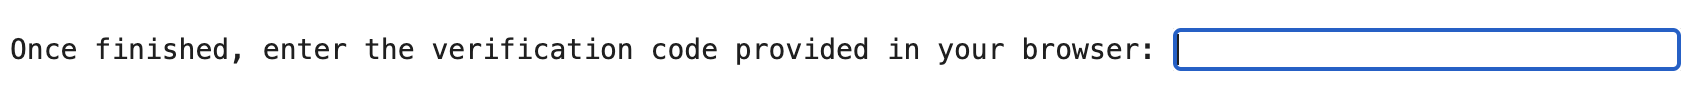

***Time: 2 minute.***

In [ ]:
# @title
!gcloud config set disable_prompts false
!gcloud auth application-default login --quiet --scopes="openid,https://www.googleapis.com/auth/userinfo.email,https://www.googleapis.com/auth/cloud-platform,https://www.googleapis.com/auth/sqlservice.login,https://www.googleapis.com/auth/analytics,https://www.googleapis.com/auth/analytics.edit,https://www.googleapis.com/auth/analytics.provision,https://www.googleapis.com/auth/analytics.readonly,https://www.googleapis.com/auth/accounts.reauth"
!gcloud auth application-default set-quota-project {PROJECT_ID}
!export GOOGLE_APPLICATION_CREDENTIALS=/content/.config/application_default_credentials.json

clear_output(wait=True)
print("SUCCESS")

SUCCESS


### 4. Prepare environment for Installation

Click the ( ▶ ) button to prepare the environment for an end-to-end installation.

***Time: 5 minutes.***

In [ ]:
# @title
%%capture
%%bash
# prompt: install packages
apt-get install python3.10
CLOUDSDK_PYTHON=python3.10

#prompt: install uv
curl -LsSf https://astral.sh/uv/install.sh | sh

export PATH="/root/.local/bin:$PATH"
uv --version

git clone --depth=1 https://github.com/tfutils/tfenv.git ~/.tfenv
echo 'export PATH="~/.tfenv/bin:$PATH"' >> ~/.bash_profile
echo 'export PATH=$PATH:~/.tfenv/bin' >> ~/.bashrc
export PATH="$PATH:~/.tfenv/bin"

mkdir -p ~/.local/bin/
. ~/.profile
ln -s ~/.tfenv/bin/* ~/.local/bin
which tfenv
tfenv --version

tfenv install 1.9.7
tfenv use 1.9.7
terraform --version

export PATH="$PATH:~/.tfenv/bin"
export PROJECT_ID=$(gcloud config get project --format=json | tr -d '"')
source ./scripts/generate-tf-backend.sh

### 5. Run Installation

Click the ( ▶ ) button to run the installation end-to-end.
After clicking the button, expand this section to observe that all cells have successfully executed without issues.

***Time: 25-30 minutes.***

In [ ]:
# @title
%%capture
%%bash
export PATH="$PATH:~/.tfenv/bin"
export GOOGLE_APPLICATION_CREDENTIALS=/content/.config/application_default_credentials.json
TERRAFORM_RUN_DIR=$(pwd)/infrastructure/terraform
terraform -chdir="${TERRAFORM_RUN_DIR}" init

In [ ]:
# @title
%%capture
%%bash
export PATH="$PATH:~/.tfenv/bin"
export PATH="/root/.local/bin:$PATH"
export PATH="$PATH:$(which gcloud)"
export GOOGLE_APPLICATION_CREDENTIALS=/content/.config/application_default_credentials.json
TERRAFORM_RUN_DIR=$(pwd)/infrastructure/terraform
terraform -chdir="${TERRAFORM_RUN_DIR}" apply -target=module.data_store -auto-approve

In [ ]:
# @title
%%capture
%%bash
export PATH="$PATH:~/.tfenv/bin"
export PATH="/root/.local/bin:$PATH"
export PATH="$PATH:$(which gcloud)"
export GOOGLE_APPLICATION_CREDENTIALS=/content/.config/application_default_credentials.json
TERRAFORM_RUN_DIR=$(pwd)/infrastructure/terraform
terraform -chdir="${TERRAFORM_RUN_DIR}" apply -target=module.feature_store -auto-approve

In [ ]:
# @title
%%capture
%%bash
export PATH="$PATH:~/.tfenv/bin"
export PATH="/root/.local/bin:$PATH"
export PATH="$PATH:$(which gcloud)"
export GOOGLE_APPLICATION_CREDENTIALS=/content/.config/application_default_credentials.json
TERRAFORM_RUN_DIR=$(pwd)/infrastructure/terraform
terraform -chdir="${TERRAFORM_RUN_DIR}" apply -target=module.pipelines -auto-approve

In [ ]:
# @title
%%capture
%%bash
export PATH="$PATH:~/.tfenv/bin"
export PATH="/root/.local/bin:$PATH"
export PATH="$PATH:$(which gcloud)"
export GOOGLE_APPLICATION_CREDENTIALS=/content/.config/application_default_credentials.json
TERRAFORM_RUN_DIR=$(pwd)/infrastructure/terraform
terraform -chdir="${TERRAFORM_RUN_DIR}" apply -target=module.activation -auto-approve

In [ ]:
# @title
%%capture
%%bash
export PATH="$PATH:~/.tfenv/bin"
export PATH="/root/.local/bin:$PATH"
export PATH="$PATH:$(which gcloud)"
export GOOGLE_APPLICATION_CREDENTIALS=/content/.config/application_default_credentials.json
TERRAFORM_RUN_DIR=$(pwd)/infrastructure/terraform
terraform -chdir="${TERRAFORM_RUN_DIR}" apply -target=module.monitoring -auto-approve

In [ ]:
# @title
%%capture
%%bash
export PATH="$PATH:~/.tfenv/bin"
export PATH="/root/.local/bin:$PATH"
export PATH="$PATH:$(which gcloud)"
export GOOGLE_APPLICATION_CREDENTIALS=/content/.config/application_default_credentials.json
TERRAFORM_RUN_DIR=$(pwd)/infrastructure/terraform
terraform -chdir="${TERRAFORM_RUN_DIR}" apply -auto-approve

In [ ]:
# @title
print("SUCCESS!")

SUCCESS!
